In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('PB_DATA_CLASSIFIER.csv')

In [3]:
data

,M:P Blends,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 6,SENSOR 8
0,100:0,2.794920,0.697810,3.28598,1.32697,1.45367,1.68367
1,98:02,0.101830,0.273910,0.39414,0.16561,0.23676,0.22437
2,96:04,0.133430,0.167670,0.53161,0.16116,0.24654,0.24632
3,95:05,0.148940,0.211170,0.50989,0.12105,0.22343,0.21249
4,94:06,0.116080,0.240250,0.61854,0.18683,0.27455,0.27851
5,92:08,0.152080,0.227370,0.35479,0.13890,0.22563,0.22878
6,90:10,0.125830,0.261160,0.15486,0.15486,0.25379,0.23382
7,85:15,0.076589,0.013710,0.51905,0.00638,0.21229,0.10782
8,80:20,0.050620,0.053050,0.12270,0.11408,0.01303,0.05253
9,70:30,0.062620,0.098064,0.06139,0.11710,0.07130,0.10966


In [4]:
def baseline_calc(input_0: pd.DataFrame) -> pd.DataFrame:
    # Extract the row corresponding to the '100:0' M:P blends
    baseline_row = input_0[input_0['M:P Blends'] == '100:0']
    
    # Set the index to 'M:P Blends' without dropping the column
    baseline_row = baseline_row.set_index('M:P Blends', drop=False)
    
    # Assign the result to the variable 'output'
    output = baseline_row
    
    return output

In [5]:
baseline_data = baseline_calc(data)
baseline_data

,M:P Blends,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 6,SENSOR 8
M:P Blends,,,,,,,
100:0,100:0,2.79492,0.69781,3.28598,1.32697,1.45367,1.68367


In [6]:
# Deviations Calculations


def deviations(input_0: pd.DataFrame, baseline_data: pd.DataFrame) -> pd.DataFrame:
    # Extract the baseline values
    baseline_values = baseline_data.iloc[0, 1:]
    
    # Subtract the baseline values from the input dataframe sensor values
    deviation_data = input_0.iloc[:, 1:].sub(baseline_values)
    
    # Combine the M:P Blends column with the deviation data
    deviation_data = pd.concat([input_0['M:P Blends'], deviation_data], axis=1)
    
    # Set the M:P Blends column as the index without dropping it
    deviation_data = deviation_data.set_index('M:P Blends', drop=False)
    
    # Rename the columns to reflect that they are deviations
    deviation_data.columns = ['M:P Blends'] + [f'{col} Deviation' for col in deviation_data.columns[1:]]
    
    # Assign the result to the output variable
    output = deviation_data
    
    return output

In [7]:
deviation_data = deviations(data, baseline_data)
deviation_data

,M:P Blends,SENSOR 1 Deviation,SENSOR 2 Deviation,SENSOR 3 Deviation,SENSOR 4 Deviation,SENSOR 6 Deviation,SENSOR 8 Deviation
M:P Blends,,,,,,,
100:0,100:0,0.0,0.0,0.0,0.0,0.0,0.0
98:02,98:02,-2.69309,-0.4239,-2.89184,-1.16136,-1.21691,-1.4593
96:04,96:04,-2.66149,-0.53014,-2.75437,-1.16581,-1.20713,-1.43735
95:05,95:05,-2.64598,-0.48664,-2.77609,-1.20592,-1.23024,-1.47118
94:06,94:06,-2.67884,-0.45756,-2.66744,-1.14014,-1.17912,-1.40516
92:08,92:08,-2.64284,-0.47044,-2.93119,-1.18807,-1.22804,-1.45489
90:10,90:10,-2.66909,-0.43665,-3.13112,-1.17211,-1.19988,-1.44985
85:15,85:15,-2.718331,-0.6841,-2.76693,-1.32059,-1.24138,-1.57585
80:20,80:20,-2.7443,-0.64476,-3.16328,-1.21289,-1.44064,-1.63114


In [8]:
# Normalized Data
from sklearn.preprocessing import MinMaxScaler

def normalized(deviation_data: pd.DataFrame) -> pd.DataFrame:
    # Select the columns to be normalized
    deviation_columns = deviation_data.columns[1:]
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Fit and transform the data
    deviation_data[deviation_columns] = scaler.fit_transform(deviation_data[deviation_columns])
    
    # Set the index to 'M:P Blends' without dropping the column
    deviation_data = deviation_data.set_index('M:P Blends', drop=False)
    
    # Rename the columns to reflect normalization
    deviation_data.columns = ['M:P Blends'] + [f'{col} (normalized)' for col in deviation_columns]
    
    # Assign the result to the output variable
    output = deviation_data
    
    return output

In [9]:
normalized_data = normalized(deviation_data)
normalized_data

,M:P Blends,SENSOR 1 Deviation (normalized),SENSOR 2 Deviation (normalized),SENSOR 3 Deviation (normalized),SENSOR 4 Deviation (normalized),SENSOR 6 Deviation (normalized),SENSOR 8 Deviation (normalized)
M:P Blends,,,,,,,
100:0,100:0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
98:02,98:02,0.023085,0.380354,0.103191,0.120575,0.159418,0.108182
96:04,96:04,0.034548,0.225055,0.145823,0.117205,0.166174,0.121596
95:05,95:05,0.040174,0.288642,0.139087,0.086832,0.150211,0.100922
94:06,94:06,0.028254,0.331150,0.172782,0.136643,0.185522,0.141268
92:08,92:08,0.041313,0.312323,0.090988,0.100349,0.151730,0.110877
90:10,90:10,0.031791,0.361716,0.028987,0.112435,0.171182,0.113957
85:15,85:15,0.013929,0.000000,0.141928,0.000000,0.142516,0.036955
80:20,80:20,0.004509,0.057506,0.019013,0.081554,0.004877,0.003166


In [10]:
#  Data Preprocessing for Training

def preprocess(normalized_data: pd.DataFrame) -> pd.DataFrame:
    features = normalized_data.filter(like='Deviation')
    labels = normalized_data['M:P Blends']
    result = pd.concat([features, labels], axis=1)
    result = result.rename(columns={'M:P Blends': 'Label'})
    output = result.set_index('Label', drop=False)
    return output

# Assuming normalized_data is the provided DataFrame
processed_data = preprocess(normalized_data)

In [11]:
processed_data

,SENSOR 1 Deviation (normalized),SENSOR 2 Deviation (normalized),SENSOR 3 Deviation (normalized),SENSOR 4 Deviation (normalized),SENSOR 6 Deviation (normalized),SENSOR 8 Deviation (normalized),Label
Label,,,,,,,
100:0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100:0
98:02,0.023085,0.380354,0.103191,0.120575,0.159418,0.108182,98:02
96:04,0.034548,0.225055,0.145823,0.117205,0.166174,0.121596,96:04
95:05,0.040174,0.288642,0.139087,0.086832,0.150211,0.100922,95:05
94:06,0.028254,0.331150,0.172782,0.136643,0.185522,0.141268,94:06
92:08,0.041313,0.312323,0.090988,0.100349,0.151730,0.110877,92:08
90:10,0.031791,0.361716,0.028987,0.112435,0.171182,0.113957,90:10
85:15,0.013929,0.000000,0.141928,0.000000,0.142516,0.036955,85:15
80:20,0.004509,0.057506,0.019013,0.081554,0.004877,0.003166,80:20


In [12]:
#  Train test split
from sklearn.model_selection import train_test_split

def test_train_split_func(features: pd.DataFrame, labels: pd.DataFrame) -> pd.DataFrame:
    # Assuming 'labels' DataFrame contains the target variable and 'features' contains the predictors
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features.drop(columns=['Label']), 
        labels['Label'], 
        test_size=0.2, 
        random_state=42
    )
    
    # Combine the splits into a single DataFrame for output
    train_data = X_train.assign(Label=y_train)
    test_data = X_test.assign(Label=y_test)
    
    # Concatenate the training and testing data
    combined_data = pd.concat([train_data, test_data], keys=['train', 'test'])
    
    # Reset index to have a meaningful multi-level index
    combined_data = combined_data.reset_index(level=0).rename(columns={'level_0': 'Split'})
    
    # Set the new index without dropping the 'Split' column
    output = combined_data.set_index('Split', append=True, drop=False)
    
    return output

# Example usage:
test_train_data_label = test_train_split_func(processed_data, processed_data)

In [13]:
#  Using different classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

def classification_func(train_features: pd.DataFrame, train_labels: pd.DataFrame, test_features: pd.DataFrame, test_labels: pd.DataFrame) -> pd.DataFrame:
    # Preprocess labels
    le = LabelEncoder()
    train_labels_encoded = le.fit_transform(train_labels['Label'])
    test_labels_encoded = le.transform(test_labels['Label'])
    
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Gaussian Naive Bayes': GaussianNB()
    }
    
    # Train and evaluate classifiers
    results = []
    for name, clf in classifiers.items():
        clf.fit(train_features.iloc[:, 1:-1], train_labels_encoded)
        predictions = clf.predict(test_features.iloc[:, 1:-1])
        accuracy = accuracy_score(test_labels_encoded, predictions)
        results.append({'Classifier': name, 'Accuracy': accuracy})
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Set index and meaningful column names
    output = results_df.set_index('Classifier', drop=False)
    output.index.name = 'Classifier Name'
    output.columns = ['Classifier', 'Accuracy Score']
    
    return output

# Example usage:
classifier_results = classification_func(test_train_data_label, test_train_data_label, test_train_data_label, test_train_data_label)

In [14]:
classifier_results

,Classifier,Accuracy Score
Classifier Name,,
Logistic Regression,Logistic Regression,0.363636
Decision Tree,Decision Tree,1.000000
Random Forest,Random Forest,1.000000
Support Vector Machine,Support Vector Machine,1.000000
K-Nearest Neighbors,K-Nearest Neighbors,0.272727
Gaussian Naive Bayes,Gaussian Naive Bayes,1.000000


In [29]:
#  Mahalanobis calculation
from scipy.spatial.distance import mahalanobis

def mahalanobis_calculation(input_0: pd.DataFrame, best_classifier: pd.DataFrame, features: pd.DataFrame, target: pd.DataFrame) -> pd.DataFrame:
    # Assuming best_classifier contains the information about the best classifier
    # and we need to use the features from input_0 to calculate Mahalanobis Distance.
    
    # Calculate the mean of the features
    feature_data = input_0.iloc[:, 1:]  # Exclude the first column which is categorical
    feature_means = feature_data.mean()
    
    # Calculate the covariance matrix and its inverse
    covariance_matrix = feature_data.cov()
    inv_covariance_matrix = np.linalg.inv(covariance_matrix)
    
    # Define a function to calculate Mahalanobis Distance for a given observation
    def mahalanobis_distance(x):
        return mahalanobis(x, feature_means, inv_covariance_matrix)
    
    # Apply the function to each row (observation) in the dataset
    input_0['Mahalanobis Distance'] = feature_data.apply(mahalanobis_distance, axis=1)
    
    # Set the index to 'M:P Blends' without dropping it
    output = input_0.set_index('M:P Blends', drop=False)
    
    # Rename the columns to give them meaningful names
    output.columns = ['M:P Blends'] + [f'SENSOR {i}' for i in range(1, 9) if i != 5 and i != 7] + ['Mahalanobis Distance']
    
    return output

# Example usage:
best_classifier = classifier_results.loc[classifier_results['Accuracy Score'].idxmax()]
mahalanobis_output = mahalanobis_calculation(normalized_data, best_classifier, test_train_data_label, test_train_data_label)

In [30]:
best_classifier

Classifier        Decision Tree
Accuracy Score              1.0
Name: Decision Tree, dtype: object

In [31]:
mahalanobis_output

,M:P Blends,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 6,SENSOR 8,Mahalanobis Distance
M:P Blends,,,,,,,,
100:0,100:0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.014617
98:02,98:02,0.023085,0.380354,0.103191,0.120575,0.159418,0.108182,2.359467
96:04,96:04,0.034548,0.225055,0.145823,0.117205,0.166174,0.121596,2.042179
95:05,95:05,0.040174,0.288642,0.139087,0.086832,0.150211,0.100922,1.733305
94:06,94:06,0.028254,0.331150,0.172782,0.136643,0.185522,0.141268,2.588185
92:08,92:08,0.041313,0.312323,0.090988,0.100349,0.151730,0.110877,2.057772
90:10,90:10,0.031791,0.361716,0.028987,0.112435,0.171182,0.113957,2.881185
85:15,85:15,0.013929,0.000000,0.141928,0.000000,0.142516,0.036955,2.961196
80:20,80:20,0.004509,0.057506,0.019013,0.081554,0.004877,0.003166,2.634667


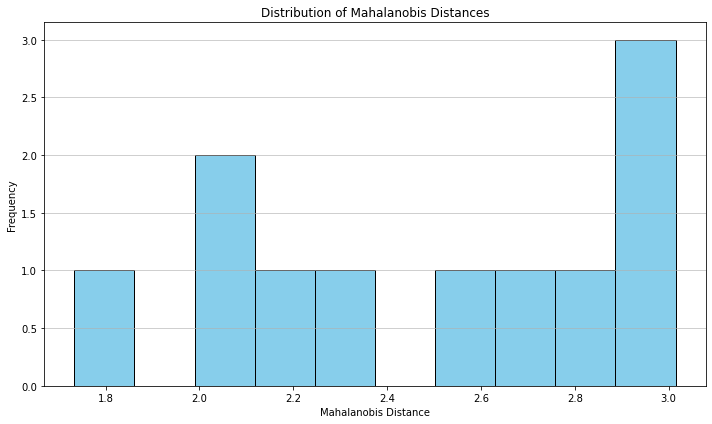

In [32]:
# Mahalanobis Plot
import matplotlib.pyplot as plt

def mahalanobis_plot(mahalanobis_distances: pd.DataFrame):
    # Create a histogram for the Mahalanobis Distance column
    plt.figure(figsize=(10, 6))
    plt.hist(mahalanobis_distances['Mahalanobis Distance'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Mahalanobis Distances')
    plt.xlabel('Mahalanobis Distance')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

mahalanobis_plot(mahalanobis_output)


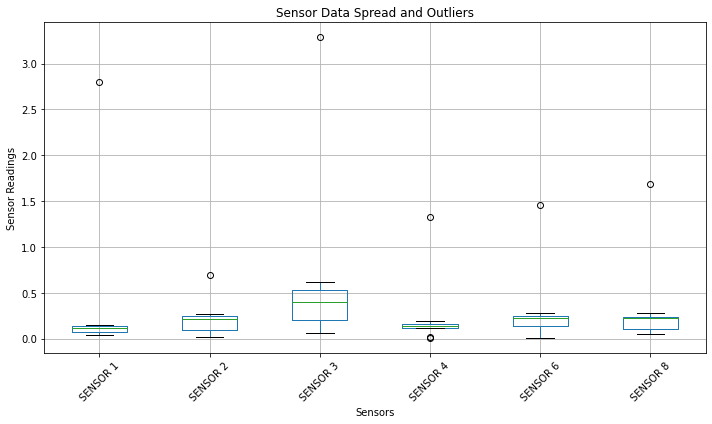

In [33]:
# Input Data Plot
import matplotlib.pyplot as plt

def invoke(input_0: pd.DataFrame):
    sensor_columns = [col for col in input_0.columns if 'SENSOR' in col]
    plt.figure(figsize=(10, 6))
    input_0.boxplot(column=sensor_columns)
    plt.title('Sensor Data Spread and Outliers')
    plt.ylabel('Sensor Readings')
    plt.xlabel('Sensors')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming input_data is the DataFrame you want to visualize
invoke(data)


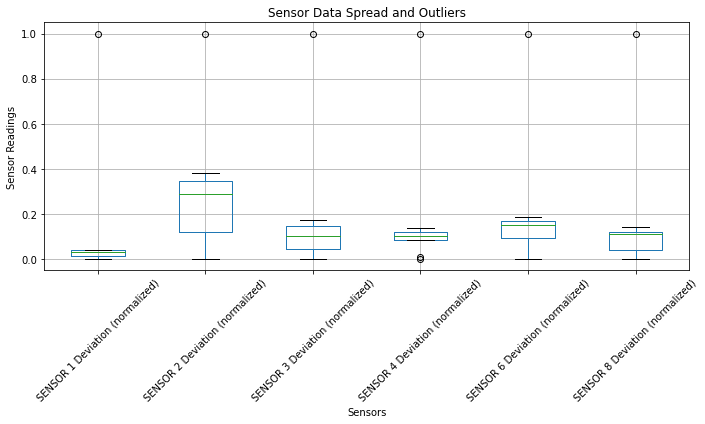

In [34]:
# Normalized Data Plot
import matplotlib.pyplot as plt

def invoke(input_0: pd.DataFrame):
    sensor_columns = [col for col in input_0.columns if 'SENSOR' in col]
    plt.figure(figsize=(10, 6))
    input_0.boxplot(column=sensor_columns)
    plt.title('Sensor Data Spread and Outliers')
    plt.ylabel('Sensor Readings')
    plt.xlabel('Sensors')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming input_data is the DataFrame you want to visualize
invoke(normalized_data)
